In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from adjustText import adjust_text

# Lista portów pozostaje bez zmian
ports = {
    'Rotterdam': (51.9225, 4.47917),
    'Hamburg': (53.55, 9.9933),
    'Antwerpia': (51.2303, 4.4055),
    'Marsylia': (43.2967, 5.37639),
    'Barcelona': (41.35, 2.15),
    'Genua': (44.4072, 8.934),
    'Pireus': (37.9436, 23.6469),
    'Brema': (53.0758, 8.8072),
    'Gdynia': (54.5189, 18.5308),
    'Kopenhaga': (55.6763, 12.5681),
    'Sztokholm': (59.3294, 18.0686),
    'Helsinki': (60.1699, 24.9384),
    'Oslo': (59.9139, 10.7522),
    'Göteborg': (57.7089, 11.9746),
    'Valletta': (35.8978, 14.5125),
    'Split': (43.5081, 16.4402),
    'Kłajpeda': (55.7033, 21.1443),
    'Ryga': (56.9489, 24.1064),
    'Tallinn': (59.4372, 24.7453),
    'Kotka': (60.4667, 26.95),
    'Rouen': (49.4431, 1.0993),
    'Le Havre': (49.49, 0.1),
    'Bordeaux': (44.8378, -0.5792),
    'Lizbona': (38.7071, -9.13549),
    'Bilbao': (43.2567, -2.92361),
    'Dublin': (53.3494, -6.2603),
    'Liverpool': (53.4075, -3.0),
    'Southampton': (50.9, -1.4),
    'Edynburg (Leith)': (55.9767, -3.1747),
    'Bergen': (60.3925, 5.3233)
}


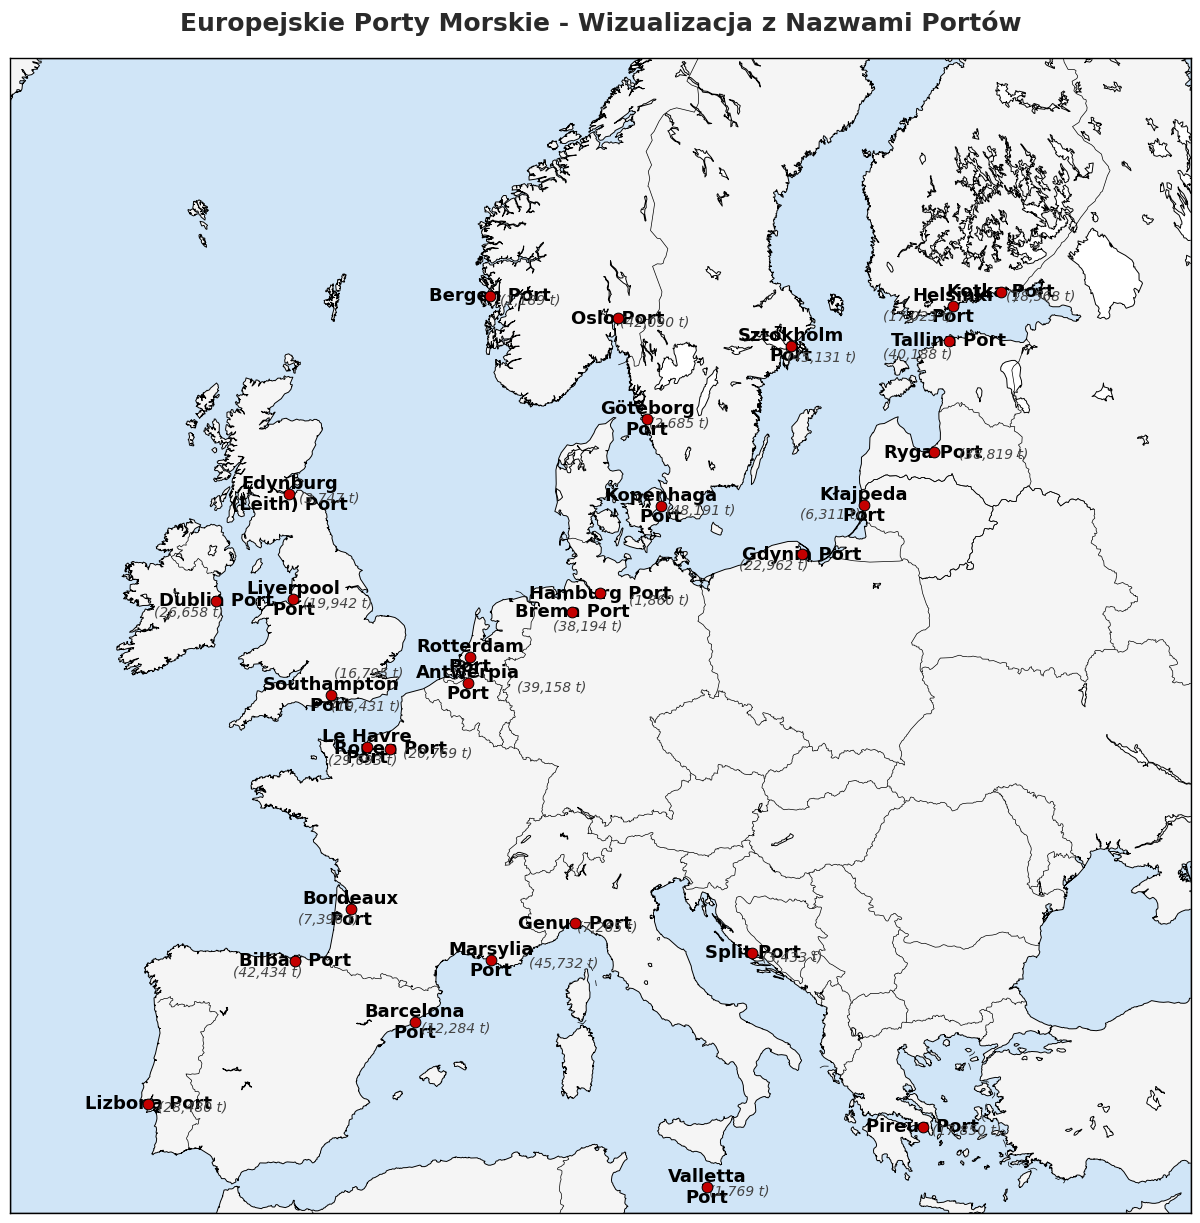

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from adjustText import adjust_text

def plot_ports(split_length=10, value_force=0.3, city_force=0.7, max_distance_km=150):
    ports = {
        'Rotterdam': (51.9225, 4.47917),
        'Hamburg': (53.55, 9.9933),
        'Antwerpia': (51.2303, 4.4055),
        'Marsylia': (43.2967, 5.37639),
        'Barcelona': (41.35, 2.15),
        'Genua': (44.4072, 8.934),
        'Pireus': (37.9436, 23.6469),
        'Brema': (53.0758, 8.8072),
        'Gdynia': (54.5189, 18.5308),
        'Kopenhaga': (55.6763, 12.5681),
        'Sztokholm': (59.3294, 18.0686),
        'Helsinki': (60.1699, 24.9384),
        'Oslo': (59.9139, 10.7522),
        'Göteborg': (57.7089, 11.9746),
        'Valletta': (35.8978, 14.5125),
        'Split': (43.5081, 16.4402),
        'Kłajpeda': (55.7033, 21.1443),
        'Ryga': (56.9489, 24.1064),
        'Tallinn': (59.4372, 24.7453),
        'Kotka': (60.4667, 26.95),
        'Rouen': (49.4431, 1.0993),
        'Le Havre': (49.49, 0.1),
        'Bordeaux': (44.8378, -0.5792),
        'Lizbona': (38.7071, -9.13549),
        'Bilbao': (43.2567, -2.92361),
        'Dublin': (53.3494, -6.2603),
        'Liverpool': (53.4075, -3.0),
        'Southampton': (50.9, -1.4),
        'Edynburg (Leith)': (55.9767, -3.1747),
        'Bergen': (60.3925, 5.3233)
    }

    np.random.seed(42)
    values = np.random.randint(1000, 50000, size=len(ports))

    plt.figure(figsize=(20, 15))
    m = Basemap(projection='merc',
                llcrnrlat=35, urcrnrlat=65,
                llcrnrlon=-15, urcrnrlon=35,
                resolution='i')

    m.drawcoastlines(linewidth=0.7)
    m.drawcountries(linewidth=0.5)
    m.fillcontinents(color='#f5f5f5')
    m.drawmapboundary(fill_color='#d0e5f7')

    x, y = m([v[1] for v in ports.values()], [v[0] for v in ports.values()])
    m.scatter(x, y, s=60, color='#c40000', edgecolor='black', linewidth=0.7, zorder=5)

    texts = []
    for (city, (lat, lon)), val in zip(ports.items(), values):
        x, y = m(lon, lat)
        
        # Dodajemy "Port" do nazwy i dzielimy tylko na spacjach
        city_with_port = f"{city} Port"
        if len(city_with_port) > split_length:
            split_pos = city_with_port.rfind(' ', 0, split_length)
            if split_pos != -1:
                city_part1 = city_with_port[:split_pos].strip()
                city_part2 = city_with_port[split_pos+1:].strip()
                city_label = f"{city_part1}\n{city_part2}"
            else:
                city_label = city_with_port
        else:
            city_label = city_with_port

        # Etykieta miasta
        txt = plt.text(
            x, y, 
            city_label,
            fontsize=13,
            fontweight='bold',
            ha='center',
            va='bottom',
            linespacing=1.2
        )
        texts.append(txt)
        
        # Etykieta wartości
        txt2 = plt.text(
            x, y-12000,
            f"({val:,} t)",
            fontsize=10,
            color='#444444',
            ha='center',
            va='top',
            fontstyle='italic'
        )
        texts.append(txt2)

    # Automatyczne dostosowanie etykiet z różnymi priorytetami
    force_params = [city_force if i%2==0 else value_force for i in range(len(texts))]
    adjust_text(texts,
                expand_points=(1.3, 1.6),
                expand_text=(1.2, 1.5),
                force_text=force_params,
                precision=0.001)

    # Ograniczenie odległości etykiet
    scale_factor = 111000 / (15 * 1000)  # Przelicznik pikseli na kilometry
    for text, (city, (lat, lon)) in zip(texts[::2], ports.items()):
        x_city, y_city = m(lon, lat)
        x_label, y_label = text.get_position()
        
        dx = x_label - x_city
        dy = y_label - y_city
        distance_px = np.sqrt(dx**2 + dy**2)
        
        if distance_px * scale_factor > max_distance_km:
            angle = np.arctan2(dy, dx)
            max_d_px = max_distance_km / scale_factor
            x_new = x_city + max_d_px * np.cos(angle)
            y_new = y_city + max_d_px * np.sin(angle)
            text.set_position((x_new, y_new))

    plt.title("Europejskie Porty Morskie - Wizualizacja z Nazwami Portów", 
             fontsize=18, pad=20, fontweight='bold', color='#2a2a2a')
    plt.show()

# Przykładowe wywołanie:
plot_ports(
    split_length=12,
    value_force=0.2,
    city_force=0.8,
    max_distance_km=180
)

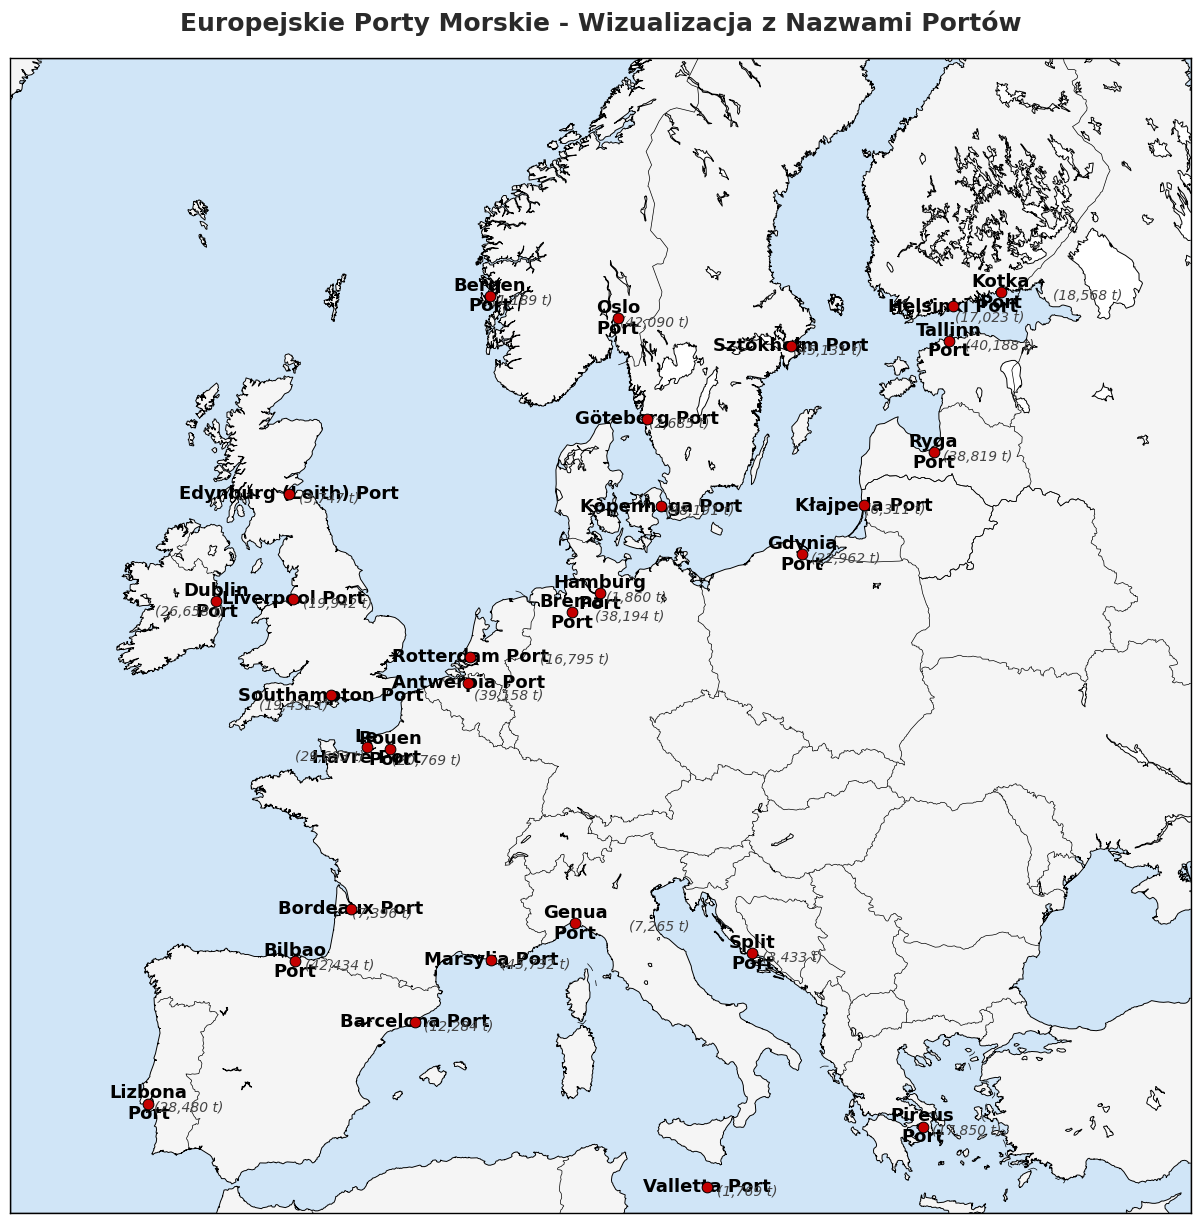

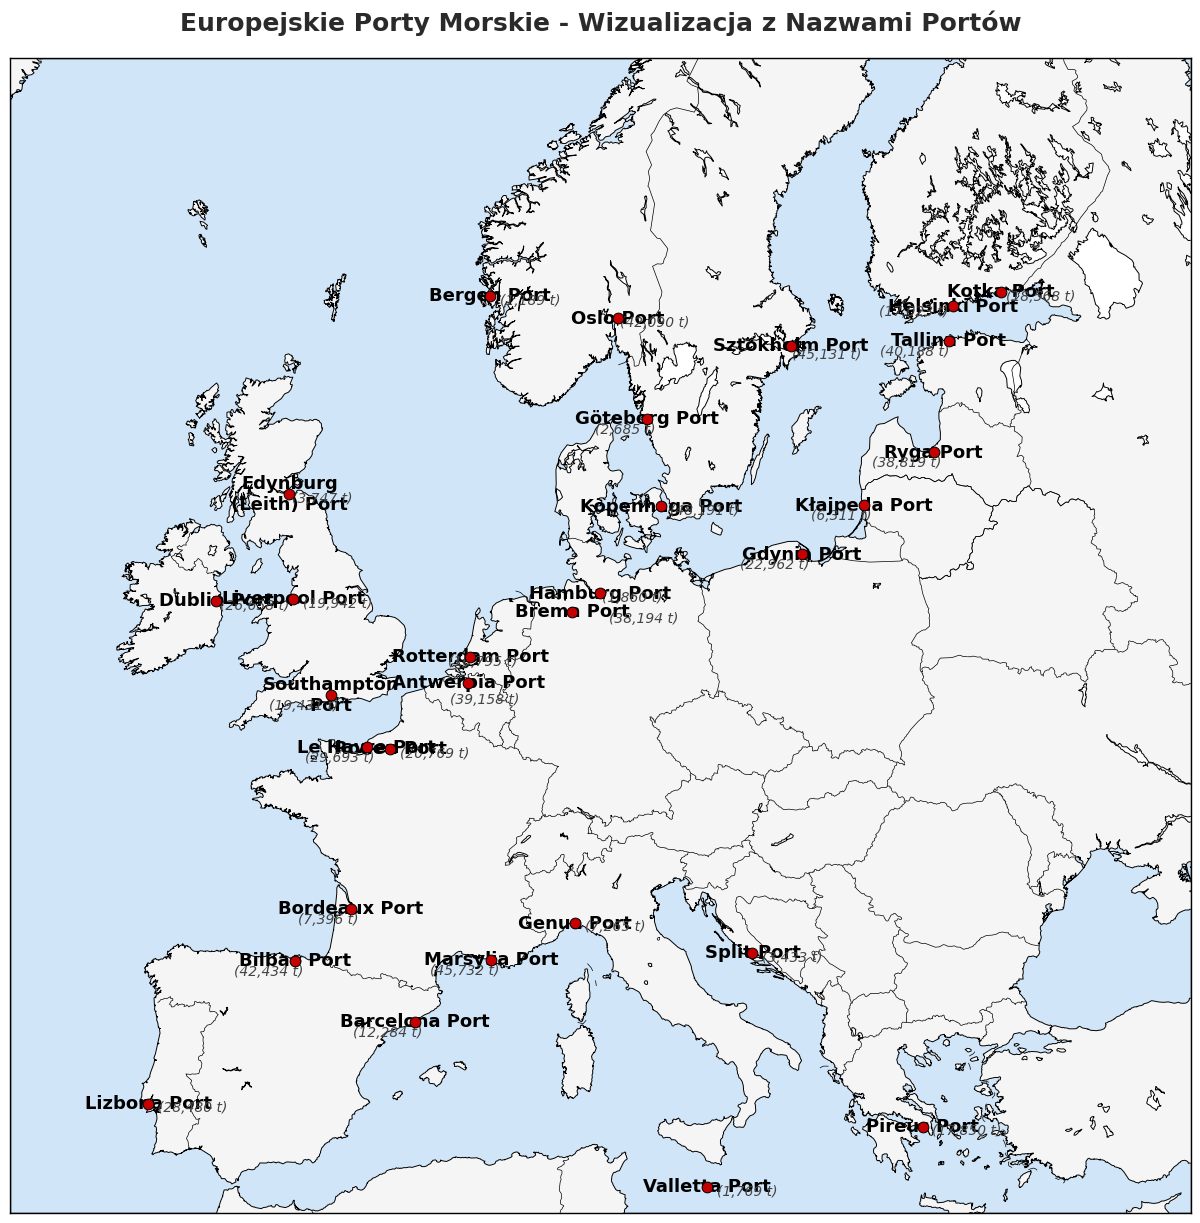

In [21]:
plot_ports(split_length=8, value_force=0.25, max_distance_km=200)
plot_ports(split_length=15, city_force=0.85, value_force=0.15)